In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(8,8))
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
%matplotlib inline


In [2]:
sc.settings.figdir = "sfig5"



In [3]:
adata=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_all_6150_umap5.h5ad.paga2.annotated9.lesionalonly')


# degs

In [4]:
adata=adata[(adata.obs["test13"].str.startswith("F3"))|
                            (adata.obs["test13"].str.startswith("F1"))|
                            (adata.obs["test13"].str.startswith("F6"))|
                              (adata.obs["test13"].str.startswith("F7"))|
                              (adata.obs["test13"].str.startswith("F_"))
                             ]

 
desired_order = ['F3: FRC-like',
       # 'F1: Epithelium-associated',
    'F1: Superficial',
    'F6: Inflammatory myofibroblast',
    'F6: Myofibroblast',
    'F7: Fascia-like myofibroblast',
    'F_Fascia'
]

# Convert 'test13' column to a categorical type with the desired order
adata.obs['test13'] = pd.Categorical(
    adata.obs['test13'],
    categories=desired_order,
    ordered=True
)



/tmp/ipykernel_16650/3344701134.py:19: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['test13'] = pd.Categorical(


In [5]:
CATEGORY = "test13"
sc.tl.rank_genes_groups(adata, CATEGORY, method='t-test', key_added="de_leiden");
df2 = pd.DataFrame(adata.uns['de_leiden']['names'])
for i,x in enumerate(df2.columns):
    print(i, x)


0 F3: FRC-like
1 F1: Superficial
2 F6: Inflammatory myofibroblast
3 F6: Myofibroblast
4 F7: Fascia-like myofibroblast
5 F_Fascia


In [6]:
# Define a function to extract genes from specified ranges
def extract_genes(df,start, end):
    return [
        gene for col in df.columns if col != "F_Fascia" 
        for gene in df[col].values[start:end]
    ]

GENES_TO_PLOT1 = extract_genes(df2, 0, 20)
GENES_TO_PLOT2 = extract_genes(df2,  20, 40)
GENES_TO_PLOT3 = extract_genes(df2, 40, 60)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


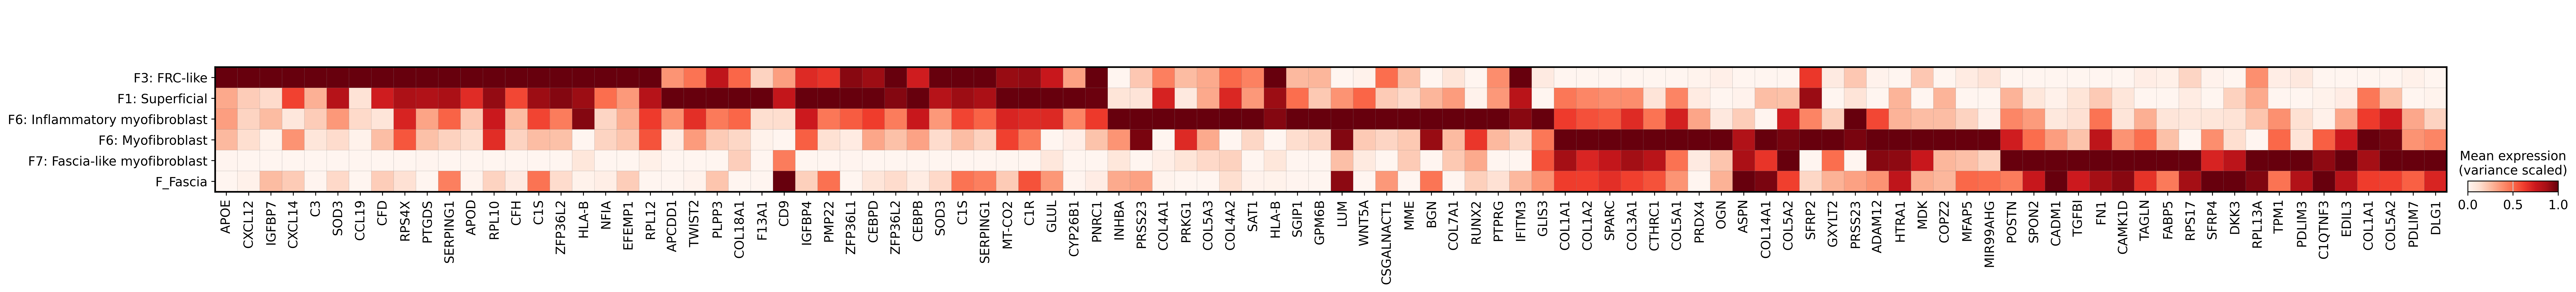

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


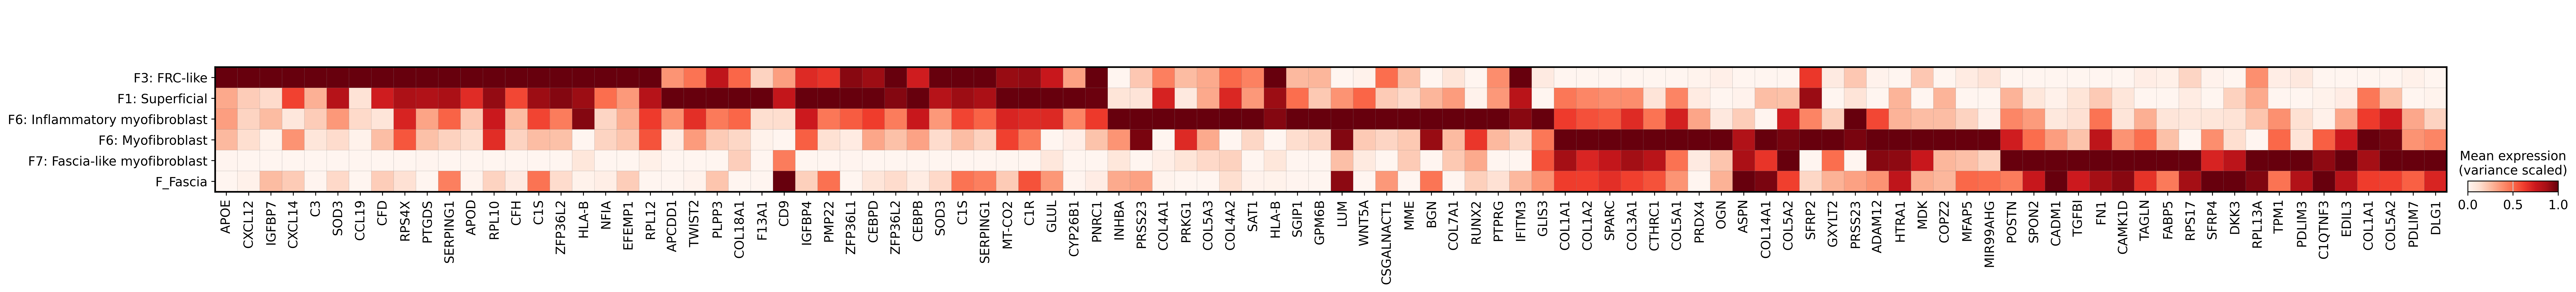

In [ ]:
for i,x in enumerate([GENES_TO_PLOT1,GENES_TO_PLOT2,GENES_TO_PLOT3]):
    sc.pl.matrixplot(
            adata,
            GENES_TO_PLOT1,
            groupby=CATEGORY,
            standard_scale="var",
            dendrogram=False,
            cmap="Reds",
            save=f"top_{i}_degs_per_popn_disease_variancedscaledexpression.pdf",
            colorbar_title='Mean expression\n(variance scaled)',
        ) 
